## Hard Clustering
<br>
<br>
<b> Introduction </b>

In reality, a lot of information (data) is unlabelled. Clustering is an unsupervised learning technique where labelled data isn't required. In this notebook we will look at Hard Clustering using KMeans. There are other Unsupervised Learning models which will be explored in this Unsupervised Learning Section. <br>

Here is a summary of some Clustering (Unsupervised models) Usecases: <br>
- Hard Clustering - Predict Clusters for each instance
- Soft Clustering as a preprocessing step (Dimensionality Reduction)
- Label Propogation - Semi Superverised Learning
- Image Segmentation
- Anomaly Detection
<br>
<br>

<b>KMeans - Hard Clustering </b> <br>
This is the term giving to Clustering when we output what "cluster" an instance belongs too.  Hard clustering is what you would expect when someone mentions clustering. If you have three different species of plants the algorithm would determine three clusters and allocate new instances into either cluster 1,2 and 3. You could manually replace cluster 1 2 and 3 with the names of species. Alternatively, you could output the distance from each cluster for each instance. This is called Soft Clustering which is disccused in more detail in another notebook. 

Prerequisites:
- Purely Numerical Data
- Data is on the same scale
 
<b> Objective </b> <br> 

<u> Prepare the Data </u>
- Generate Blobs 
- Add title/Label Data
- View the Data

<u> Determining k, the number of clusters </u>
- Elbow Technique
- Silhouete Technique
- Interpret all the associated graphs to determine k

<u> Predict </u>
- Allocate all values to a cluster
- Allocate new values to its cluster

<u> Visualise your Data </u> 
- Obtain cluster centers values 
- Plot Centroids and values for each cluster 2D
- Plot Centroids and values for each cluster 3D
- Box Plots to gain a deeper understanding of each cluster


<b> 1. Generate Blobs to Demonstrate Clustering </b> <br>
To practice clustering we will use a scikit learn package to generate some random blobs. Blobs is the same as clusters in this case. If we select 5 blobs, the package will randomly create x and y value pairs (co-ordinates) that can be grouped into 5 seperate blobs.<br> 

Since we artifically created 3 blobs we know the value for k is 3. This will be a good experiement to see if the model finds the value for k = 3 later on in the notebook.

In [9]:
from sklearn.datasets.samples_generator import make_blobs

X, b = make_blobs(n_samples=20, centers=3, n_features=2,center_box =(1, 20),
               random_state=0)
# b is the blob it is allocated too
# X is a variable that contains tue x and y values coordinates
# 20 pairs of values

# 3 distinct blobs generated by sklearn
# 2 dimensional dataset (2 columns)

In [10]:
X #X contains the x and y values, whereas b is the blob is belongs too

array([[11.57150015, 16.04287147],
       [ 8.66211437, 12.9696854 ],
       [11.74052428, 13.73450222],
       [12.60745157, 11.730943  ],
       [14.72225877,  9.8984148 ],
       [ 8.00088822, 11.85197021],
       [ 7.343171  , 15.22276354],
       [11.5647184 ,  9.37198401],
       [11.32423772, 14.99919646],
       [12.37754499, 14.43724075],
       [13.98528336, 12.82213925],
       [12.92153565, 14.3834397 ],
       [ 9.89951433, 12.00639907],
       [12.49826266, 11.16559663],
       [12.1884943 , 14.71027298],
       [ 8.53978901, 12.83391385],
       [10.27973187, 14.474368  ],
       [ 8.70152904, 13.42833712],
       [13.31694034, 10.61061546],
       [11.87131981, 14.92227229]])

In [11]:
b #These are the "Blobs" each pair of values belong too

array([0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0])

#### 2.  Adding Titles to the two Columns

In [12]:
import pandas as pd
df = pd.DataFrame({'Time Spent Studying (Days)': X[:, 0],
                   'Time spent Relaxing (Days)': X[:, 1]})

#Let's make a scenario to conceptualise the type of problems we could explore. 
#The values represent time spent studying and time spent relaxing by students

In [13]:
df =df.round(0)  #Since our example is about days studying, lets round them

In [14]:
df               #View our Dataset

,Time Spent Studying (Days),Time spent Relaxing (Days)
0,12.0,16.0
1,9.0,13.0
2,12.0,14.0
3,13.0,12.0
4,15.0,10.0
5,8.0,12.0
6,7.0,15.0
7,12.0,9.0
8,11.0,15.0
9,12.0,14.0


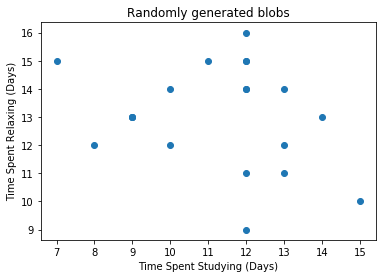

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,0], df.iloc[:,1]) #First Column vs Second Column
plt.title('Randomly generated blobs')   #Title
plt.xlabel('Time Spent Studying (Days)')#X Label
plt.ylabel('Time Spent Relaxing (Days)')#y Label
plt.show()


<u> How Many Clusters do you think are present? </u> <br>
I see three, however If someone asked me to group them in to 4 or 5 groups we could do that too! <br>
This is k, the amount of groups (clusters) we want to bucket our values into <br>

This raises an important point. Some people may think there is 2 4 or even 5 clusters. There are techniques that exist that help guide us to predict the number of clusters. For example the Elbow Method or Silhouette Score.

#### 3. KMeans - How does it work?

1.) Select centroids <b> randomly </b>

2.) Update Centroids
 
3.) Label instances

4.) Repeat

The image below this cell block shows how the centroids update over various iterations

In reality, the Kmeans algorithm now defaults with the KMeans ++ Initialization. This imporvement introduces a smarter initialization step  that encourages instances further away from already chosen centroids.

<u> Limitations </u>

Right solution may not be achieved. This depends on the initialization step. There are methods to mitake this risk for example through centroid initialization methods. We will show one of these examples with a good initialization later on in the notebook.

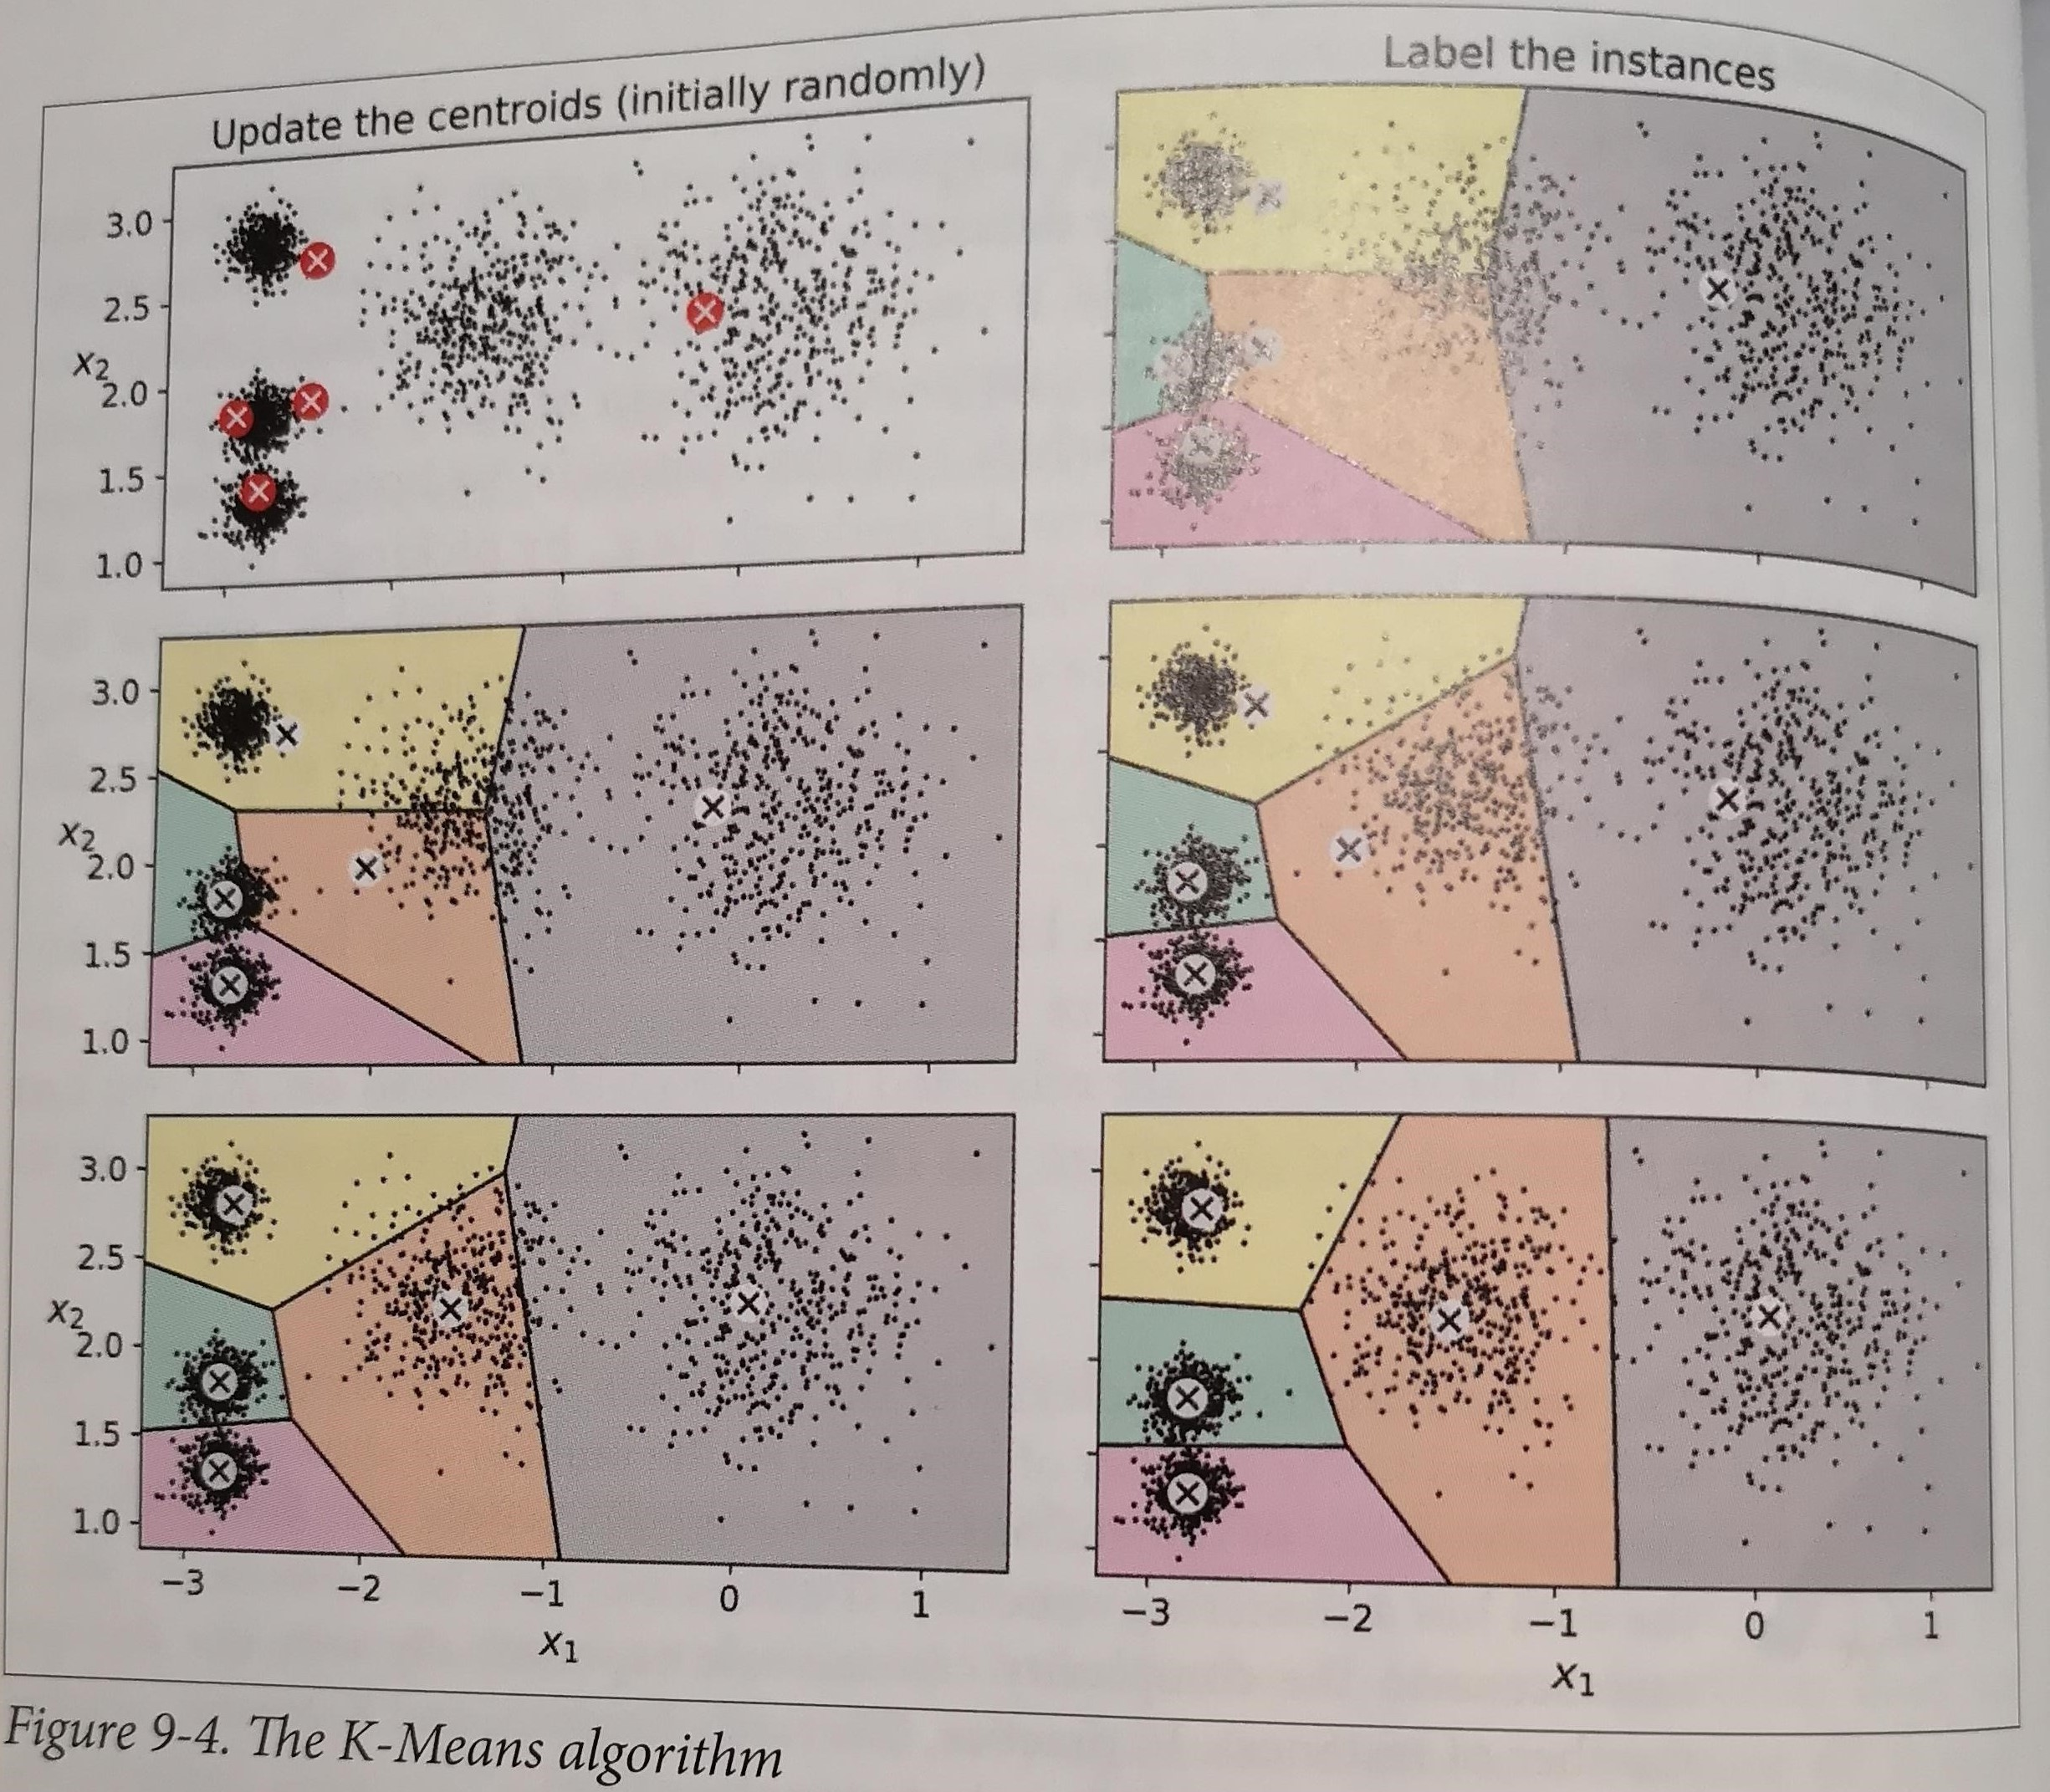

#### 4. Determining the Number of Clusters (k) - Elbow Method

The algorithm KMeans performance depends on it's initialisations. It is defaulted at 10 meaning it runs 10 times. The selected model will be the one with the lowest <b> inertia </b>. 

Inertia is the mean squared distances between each instance and its closest centroid. In 2006 K-Means ++ was proposed which is the smarter initialization step that tends to select centroids that are distance from one another, and this improvement makes the KMeans algorithm much less likely to converge to a suboptimal solution.

If asked to describe the KMeans discuss the steps outlined in the above cell

If asked to describe the KMeans ++ Algorithm:

It allows for a better initialisation. It acomplishes this by using a mathematical technique encouraging instances farther away from the already chosen centroid from being selected as centroids.

The algorithm:
1. Take one centroid c(1), chosen uniformly at random from the dataset.
2. Take a new centroid c(i),choosing an instance x(i) with probability D(x(i))^2/Sum(D(x(j))^2, where D(x(i)) is the distance between the instance x(i) and the closest centroid.

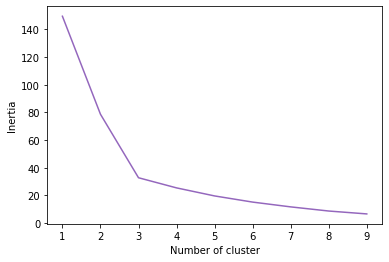

In [16]:
#Fortunately for us the packages available does most the hard work!
#All we need to do is plot inertia for each k and find the inflection point

from sklearn.cluster import KMeans
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(X)
    sse[k] = kmeans.inertia_
    

plt.plot(list(sse.keys()), list(sse.values()), color='tab:purple')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [17]:
sse.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])

<u> Interpret the Graph - KMeans Elbow Technique </u> <br>
k = 3 as Inertia tends to plateau after this point.<br>


As we can see there is a distinct elbow at k = 3. We don't go for the lowest amount of inertia. Inertia will always decrease as we increase the number of clusters.

It's important to bare in mind that a lower inertia is not neccesarily better. While we want to reduce inertia, we don't want to split a perfectly sound category/cluster into an extra group for no reason.|

#### 5. Determining k - Silhouette Score (Preferred Method)
This technique is more computationally expensive, but it is more precise method to selecting the correct value for k than the elbow technique. It also gives us an idea of which values are a bad choice for k. <br>

Silhouette coefficient is equal to (b-a)/max(a,b).<br>
Where <b> a </b> is the mean distance to the other instances in the same cluster (i/e the mean intra-cluster distance)<br>
<b> b </b> is the mean nearest-cluster distance

The silhoueete coefficient can vary between -1 to +1.<br>
+1 means the instance is well inside its own cluster and far from other clusters. <br>
0 means that it is close to a cluster boundary <br>
-1 means the instance may have been assigned to the wrong cluster.

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(2, 10)]

In [19]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[0:]]

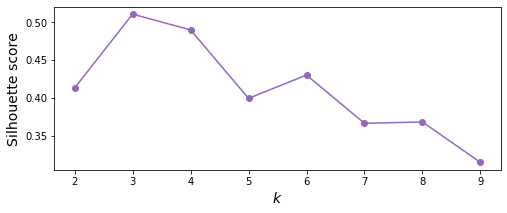

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10),silhouette_scores, "bo-", color='tab:purple')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis()
plt.show()

<u> Interpret the Graph - Silhouette Technique </u> <br>
In this graph the higher the value the better the value for k.<br>
3 is clearly the best value for k for this given dataset.

As we can see there is a distinct elbow at k = 3. This indicates increasing the number of clusters gains insignificant amount of inertia. Also it's important to bare in mind that a lower inertia is not neccesarily better. While we want to reduce inertia, we don't want to split a perfectly sound category/cluster into an extra group for no reason. <br>

#### 6. Recreate KMeans Model ( k=3)
We know that 3 clusters is the optimumn value. Recreate the model with k = 3.

In [25]:
k = 4                        
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans = kmeans.fit(df)

#### 7. KMeans - Predicting using our Model
Now we have our model we can predict what cluster new values belong too.

In [26]:
from sklearn.cluster import KMeans
import joblib

df['Cluster'] = kmeans.predict(df) + 1 #We add 1 since the index of clusters start at 0. It's just more friendly to say cluster 1 than cluster 0

In [27]:
df #Clusters Identified by algorithm

,Time Spent Studying (Days),Time spent Relaxing (Days),Cluster
0,12.0,16.0,2
1,9.0,13.0,3
2,12.0,14.0,2
3,13.0,12.0,1
4,15.0,10.0,4
5,8.0,12.0,3
6,7.0,15.0,3
7,12.0,9.0,4
8,11.0,15.0,2
9,12.0,14.0,2


#### 8. Let's Visualise our Cluster Centers
Centroids are the name of the cluster centers determined by the algorithm. We can obtain these values and visualise them as seen below.

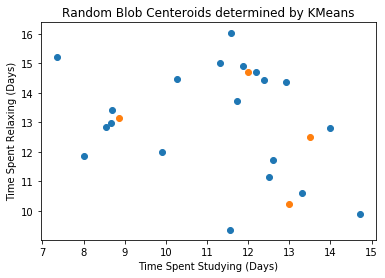

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]) #Col1 and Col2 extracted from kmeans.cluster_centers_ table
plt.title('Random Blob Centeroids determined by KMeans')
plt.xlabel('Time Spent Studying (Days)')
plt.ylabel('Time Spent Relaxing (Days)')
plt.show()

Lets make each Cluster a different Colour

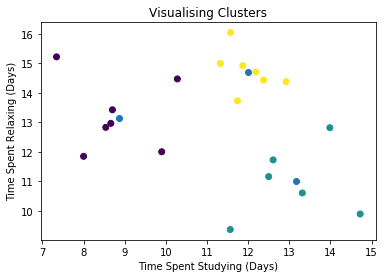

In [50]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.title('Visualising Clusters')
plt.xlabel('Time Spent Studying (Days)')
plt.ylabel('Time Spent Relaxing (Days)')
plt.show()



Function taking from the book to plot decision boundaries for 2D datasets

In [51]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

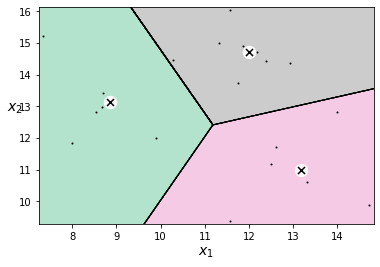

In [52]:
import numpy as np
plot_decision_boundaries(kmeans_per_k[1], X)
plt.show()

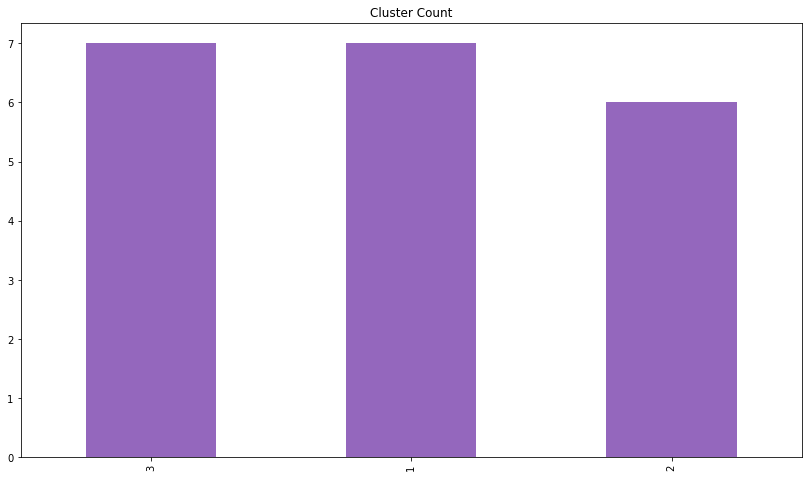

In [57]:
ax = df['Cluster'].value_counts().plot.bar(
                                    figsize=(14,8),
                                    color='tab:purple',
                                    title="Cluster Count",
                                    )

It seems that most enteries are of cluster 3 and 1 scenarios. However, there is practically equal cases for each cluster type. Next we can produce box plots to understand more about the values that make up each cluster.

In [58]:
d={}
for x in range(1,4):
        d["df{0}".format(x)]= df[(df.Cluster == x)]


In [59]:
d

{'df1':     Time Spent Studying (Days)  Time spent Relaxing (Days)  Cluster
 1                          9.0                        13.0        1
 5                          8.0                        12.0        1
 6                          7.0                        15.0        1
 12                        10.0                        12.0        1
 15                         9.0                        13.0        1
 16                        10.0                        14.0        1
 17                         9.0                        13.0        1,
 'df2':     Time Spent Studying (Days)  Time spent Relaxing (Days)  Cluster
 3                         13.0                        12.0        2
 4                         15.0                        10.0        2
 7                         12.0                         9.0        2
 10                        14.0                        13.0        2
 13                        12.0                        11.0        2
 18                

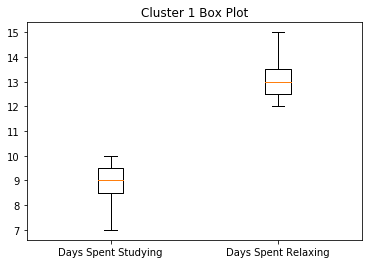

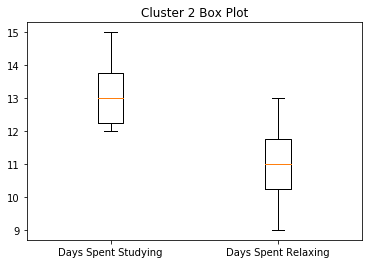

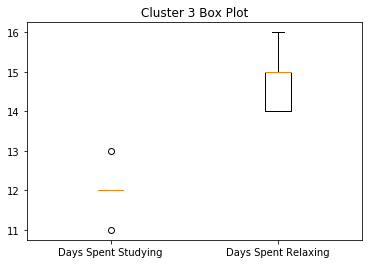

In [60]:
for x in range(1,4):
    fig1,ax1 = plt.subplots()
    box_plot_data=[d["df{0}".format(x)].iloc[:,0],d["df{0}".format(x)].iloc[:,1]]
    plt.boxplot(box_plot_data)
    ax1.set_title("Cluster {0} Box Plot".format(x))
    plt.xticks([1, 2], ['Days Spent Studying','Days Spent Relaxing'])
    plt.show()
    
    #7-15 studying
    #
    #9-16 relaxing

   

By using the box plots we can clearly see there is three different scenarios

Now you could use these clusters analyse your data and see if there are any correlations with exam results based on which cluster you are in.


#### 8. Limitations of KMeans

A limitation of KMeans is that it struggles to form clusters of different densities or nonspeherical shapes <br> 
Other algorithms such as DBSCAN may be more appropriate based on the spread of values. <br>

A good init is required to find a great solution. <br>
If you know roughly where the clusters lie beforehand you can force the init. 

Let's take the example below to emphasize the problem.

In [61]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [62]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

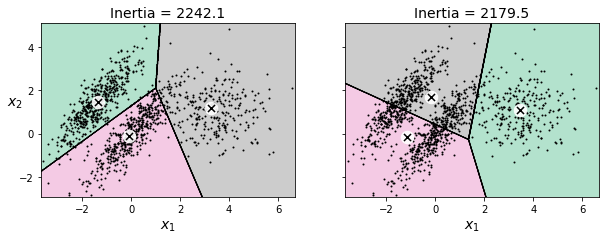

In [63]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)


plt.show()

The first one is a good example whereas the second image shows how the model failed to cluster correctly

#### Summary
So far we have learn't:
- How to determine the appropriate value for the number of clusters (k) by using Elbow and Silloutte Technique
- How to determine the Cluster Centroids of a numerical dataset
- Predict what cluster values lie in
- How to plot 2D data and visualise your clusters effectively

<b> Expected Questions ?</b> <br>
<u> Can we perform this on a higher dimensional dataset? </u> <br>

Yes, You can experiment by changing the number of features in the first cell from 2 to 5. Run the remaining cells and compare the values. See the remaining code below to see an example on a 3 Dimensional Dataset

<u> How do we visualise this higher dimensional dataset? </u>

Unfortunately, we are unable to visualise effectively on higher dimensions (> 3). While you can still produce 3D plots, anything higher wouldn't convey the message clearly. There is a method around this where you use a dimensionality reduction technique such as PCA and plot the corresponding values. Since the aim of PCA is to lower the dimensionality whilst retaining important information, trends should still be exhibitted. <br>

<u> How do we know whether to use Elbow or Silhouette? </u> <br>
You can use both to validate your findings. Most importantly remember silhouette is computationally expensive. There may be times you can't use silhouette due to the volume/velocity/variability of your data.


#### Examples on 3D Dataset

In [64]:
from sklearn.datasets.samples_generator import make_blobs

X2, y2 = make_blobs(n_samples=20, centers=5, n_features=3,
               random_state=0)
# 20 pairs of values
# 3 clusters
# 2 dimensional dataset

In [65]:
X2

array([[ 0.94502848, -0.06416357,  4.45291139],
       [ 1.22810697,  9.13173383, -6.78811037],
       [-3.98574039,  5.19477812,  0.09847859],
       [ 1.78628462,  8.48396158, -7.103289  ],
       [-1.8825321 ,  4.84207099,  0.35195874],
       [-1.27950111,  7.69598605,  9.08259923],
       [ 2.29313593,  0.26058003,  2.348365  ],
       [ 1.46058223,  4.88292781,  1.87368495],
       [ 1.65683732,  2.74029064,  1.4885699 ],
       [ 0.01551547,  4.6807143 ,  2.08870645],
       [-1.07286924,  7.37295448,  8.18745461],
       [ 1.4641037 , -1.37763892,  1.83960426],
       [-2.69769356,  6.95421272,  0.11997597],
       [ 0.65551415, -0.01251273,  2.58482486],
       [ 2.38647471,  3.92931564,  2.33046584],
       [-0.25254443,  5.90225524,  9.52178584],
       [-0.60851978,  7.44959668,  8.49749286],
       [-2.01980612,  5.05848029,  0.27053358],
       [ 1.00726337,  7.7711853 , -9.25430067],
       [ 2.00767132,  8.14759845, -9.25805623]])

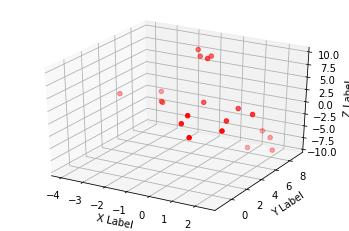

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


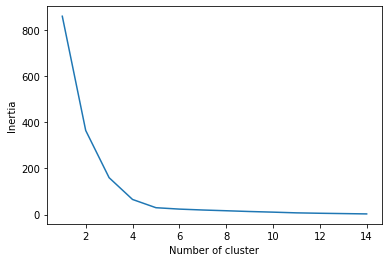

In [67]:
#But we have to pick the number of clusters? More on this soon
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(X2)
    sse[k] = kmeans.inertia_
    

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [68]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2)
                for k in range(2, 10)]

In [69]:
silhouette_scores = [silhouette_score(X2, model.labels_)
                     for model in kmeans_per_k[0:]]

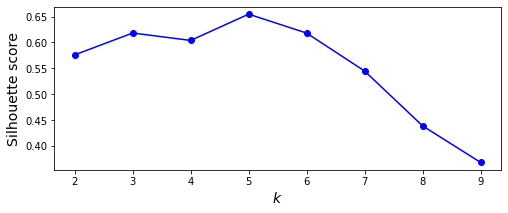

In [70]:
silhouette_scores = [silhouette_score(X2, model.labels_)
                     for model in kmeans_per_k[0:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis()
plt.show()

In [71]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X2)

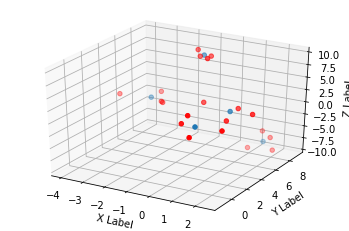

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], marker = 'o')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
